In [29]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [30]:
application_df.shape

(34299, 12)

In [31]:
application_df=application_df.drop(['EIN','NAME'],axis=1)

application_types_to_replace=['T9','T13','T12','T2','T14','T25','T15','T29','T17']

for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")
    
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [32]:
application_df=application_df.groupby('CLASSIFICATION').filter(lambda x: len(x) > 1)
application_df['CLASSIFICATION'].value_counts()


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C1234        2
C1256        2
C1246        2
C1267        2
C3200        2
Name: CLASSIFICATION, dtype: int64

In [33]:
classification_dict=application_df['CLASSIFICATION'].value_counts().to_dict()

classifications_to_replace=[]

for key, value in classification_dict.items():
    if value <500:
        classifications_to_replace.append(key)
        
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe

for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1458
C7000      777
Name: CLASSIFICATION, dtype: int64

In [34]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [35]:
application_df['STATUS'].value_counts()


1    34268
0        5
Name: STATUS, dtype: int64

In [36]:
# dropping rows with active status 0
application_df=application_df.loc[application_df['STATUS']==1,:]


<AxesSubplot:>

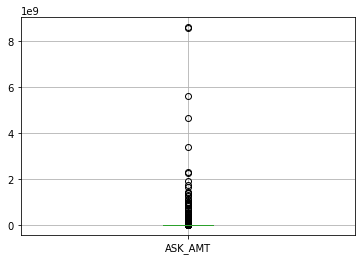

In [37]:
# checking for outliers in cols

import matplotlib.pyplot as plt
application_df.boxplot(column=['ASK_AMT'])

In [38]:
max_ASK_AMT=application_df['ASK_AMT'].max()
min_ASK_AMT=application_df['ASK_AMT'].min()

print (f'max_ASK_AMT : {max_ASK_AMT}')
print (f'min_ASK_AMT : {min_ASK_AMT}')

max_ASK_AMT : 8597806340
min_ASK_AMT : 5000


In [39]:
import numpy as np
quartiles=np.quantile(application_df['ASK_AMT'],[.25,.75])
iqr=quartiles[1]-quartiles[0]
lower_band=quartiles[0]-1.5*iqr
upper_band=quartiles[1]+ 1.5*iqr

#dropping outliers
filt=(application_df['ASK_AMT']<=upper_band)| (application_df['ASK_AMT']>=lower_band)
application_df=application_df.loc[filt,:]

In [40]:
application_df.shape

(34268, 10)

In [41]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df_encoded =pd.get_dummies(application_df, drop_first=True)
application_df_encoded.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000',
       'CLASSIFICATION_Other', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object')

In [42]:
application_df_encoded.shape

(34268, 38)

In [43]:
X=application_df_encoded.drop(['IS_SUCCESSFUL'],axis=1)
y=application_df_encoded['IS_SUCCESSFUL']

In [44]:
X.shape

(34268, 37)

In [45]:
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [46]:
# Create a StandardScaler instances
scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Attempt 1 for optimization selecting different hyperparameters


In [49]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=25,activation='relu',input_dim=37))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=17,activation='relu'))
nn.add(tf.keras.layers.Dense(units=12,activation='tanh'))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 25)                950       
_________________________________________________________________
dense_17 (Dense)             (None, 17)                442       
_________________________________________________________________
dense_18 (Dense)             (None, 12)                216       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 13        
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


In [50]:
nn.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

# Train the model
#  YOUR CODE GOES HERE
fit_model=nn.fit(X_train_scaled,y_train,batch_size=10,shuffle=True,epochs=50)

Epoch 1/50
2571/2571 [==============================] - 5s 2ms/step - loss: 0.5744 - accuracy: 0.7151
Epoch 2/50
2571/2571 [==============================] - 4s 2ms/step - loss: 0.5553 - accuracy: 0.7285: 1s - l - ETA: 0s - l
Epoch 3/50
2571/2571 [==============================] - 4s 1ms/step - loss: 0.5520 - accuracy: 0.7300
Epoch 4/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5501 - accuracy: 0.7319
Epoch 5/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5487 - accuracy: 0.7325
Epoch 6/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5481 - accuracy: 0.7322
Epoch 7/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5473 - accuracy: 0.7330
Epoch 8/50
2571/2571 [==============================] - 4s 2ms/step - loss: 0.5470 - accuracy: 0.7338
Epoch 9/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5462 - accuracy: 0.7326
Epoch 10/50
2571/2571 [==============================] - 3s 

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5540 - accuracy: 0.7196
Loss: 0.5540463924407959, Accuracy: 0.7196217775344849


In [52]:
from tensorflow import keras
nn.save('Optimizer/AlphabetSoupCharity_Optimization1.h5')
nn_model = keras.models.load_model('Optimizer/AlphabetSoupCharity_Optimization1.h5')

### Attempt2 for model optimizationm

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=25,activation='relu',input_dim=37))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=17,activation='relu'))
nn.add(tf.keras.layers.Dense(units=12,activation='relu'))
nn.add(tf.keras.layers.Dense(units=8,activation='relu'))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 25)                950       
_________________________________________________________________
dense_5 (Dense)              (None, 17)                442       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                216       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


In [27]:
nn.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

# Train the model
#  YOUR CODE GOES HERE
fit_model=nn.fit(X_train_scaled,y_train,batch_size=10,shuffle=True,epochs=50)

Epoch 1/50
2571/2571 [==============================] - 3s 996us/step - loss: 0.6265 - accuracy: 0.6606
Epoch 2/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5753 - accuracy: 0.7251
Epoch 3/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5642 - accuracy: 0.7290
Epoch 4/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5598 - accuracy: 0.7309
Epoch 5/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5574 - accuracy: 0.7302
Epoch 6/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5556 - accuracy: 0.7313
Epoch 7/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5547 - accuracy: 0.7322
Epoch 8/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5532 - accuracy: 0.7315
Epoch 9/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5521 - accuracy: 0.7335
Epoch 10/50
2571/2571 [==============================] - 4s 2ms/step - loss: 0.5

In [28]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5609 - accuracy: 0.7161
Loss: 0.5608525276184082, Accuracy: 0.7161200046539307


In [29]:
from tensorflow import keras
nn.save('Optimizer/AlphabetSoupCharity_Optimization2.h5')
nn_model = keras.models.load_model('Optimizer/AlphabetSoupCharity_Optimization2.h5')

### Attempt3 for model optimization

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=30,activation='relu',input_dim=37))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=20,activation='relu'))
nn.add(tf.keras.layers.Dense(units=15,activation='relu'))
nn.add(tf.keras.layers.Dense(units=10,activation='relu'))


# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                1140      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_11 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 2,246
Trainable params: 2,246
Non-trainable params: 0
_________________________________________________________________


In [31]:
nn.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

# Train the model
#  YOUR CODE GOES HERE
fit_model=nn.fit(X_train_scaled,y_train,batch_size=10,shuffle=True,epochs=50)

Epoch 1/50
2571/2571 [==============================] - 4s 2ms/step - loss: 0.6358 - accuracy: 0.6600
Epoch 2/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5744 - accuracy: 0.7225
Epoch 3/50
2571/2571 [==============================] - 4s 1ms/step - loss: 0.5624 - accuracy: 0.7285: 0s - loss: 0.5626 - accuracy: 
Epoch 4/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5567 - accuracy: 0.7316
Epoch 5/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5532 - accuracy: 0.7333
Epoch 6/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5511 - accuracy: 0.7328
Epoch 7/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5493 - accuracy: 0.7338
Epoch 8/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5481 - accuracy: 0.7340
Epoch 9/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5474 - accuracy: 0.7340
Epoch 10/50
2571/2571 [===========================

In [32]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5588 - accuracy: 0.7196
Loss: 0.5587584376335144, Accuracy: 0.7196217775344849


In [33]:
from tensorflow import keras
nn.save('Optimizer/AlphabetSoupCharity_Optimization3.h5')
nn_model = keras.models.load_model('Optimizer/AlphabetSoupCharity_Optimization3.h5')

### Trying to search Best hyperparameters using Keras Tuner

In [34]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=15,
        max_value=30,
        step=5), activation=activation, input_dim=37))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=15,
            max_value=50,
            step=5),
            activation=activation))
    
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    
    return nn


In [35]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [36]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))


Trial 60 Complete [00h 00m 27s]
val_accuracy: 0.7161200046539307

Best val_accuracy So Far: 0.7191548943519592
Total elapsed time: 00h 10m 47s
INFO:tensorflow:Oracle triggered exit


In [37]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'relu', 'first_units': 25, 'num_layers': 4, 'units_0': 30, 'units_1': 50, 'units_2': 35, 'units_3': 40, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 25, 'num_layers': 4, 'units_0': 45, 'units_1': 40, 'units_2': 25, 'units_3': 35, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '1693fd988a857f7e5b01665f95f837fa'}
{'activation': 'relu', 'first_units': 25, 'num_layers': 4, 'units_0': 45, 'units_1': 40, 'units_2': 25, 'units_3': 35, 'tuner/epochs': 7, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}


In [38]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5631 - accuracy: 0.7192
Loss: 0.5630514025688171, Accuracy: 0.7191548943519592
268/268 - 0s - loss: 0.5621 - accuracy: 0.7176
Loss: 0.5620737671852112, Accuracy: 0.7176374197006226
268/268 - 0s - loss: 0.5679 - accuracy: 0.7173
Loss: 0.5679413676261902, Accuracy: 0.7172872424125671
